# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Load the Dataset
Load the Titanic dataset from the CSV file using pandas.

In [2]:
# Load the Dataset
titanic_df = pd.read_csv('Titanic Dataset.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Explore the Dataset
Perform initial exploration of the dataset, including checking the first few rows, data types, and summary statistics.

In [3]:
# Display the first few rows of the dataset
titanic_df.head()

# Check the data types of each column
titanic_df.dtypes

# Get summary statistics of the dataset
titanic_df.describe()

# Check for missing values in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning
Handle missing values, correct data types, and remove unnecessary columns.

In [4]:
# Data Cleaning

# Handle missing values
# Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port of embarkation
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Correct data types
# Convert 'Survived' and 'Pclass' to categorical data types
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

# Remove unnecessary columns
# Drop the 'Ticket' column as it is not useful for analysis
titanic_df.drop(columns=['Ticket'], inplace=True)

# Display the cleaned dataset
titanic_df.head()

# Verify the changes
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    object  
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Fare         417 non-null    float64 
 9   Embarked     418 non-null    object  
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 27.3+ KB


C:\Users\Jain\AppData\Local\Temp\ipykernel_2772\1769695446.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\Jain\AppData\Local\Temp\ipykernel_2772\1769695446.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

# Feature Engineering
Create new features from existing data to improve model performance.

In [5]:
# Feature Engineering

# Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Create a new feature 'IsAlone' (1 if alone, 0 otherwise)
titanic_df['IsAlone'] = 1  # Initialize to 1
titanic_df['IsAlone'].loc[titanic_df['FamilySize'] > 1] = 0  # Update to 0 if FamilySize > 1

# Create a new feature 'Title' from 'Name'
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify 'Title' feature by grouping rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_df['Title'] = titanic_df['Title'].replace(rare_titles, 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Convert 'Title' to categorical data type
titanic_df['Title'] = titanic_df['Title'].astype('category')

# Create a new feature 'AgeGroup' by binning 'Age'
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])

# Create a new feature 'FareGroup' by binning 'Fare'
titanic_df['FareGroup'] = pd.qcut(titanic_df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Display the dataset with new features
titanic_df.head()

C:\Users\Jain\AppData\Local\Temp\ipykernel_2772\556772780.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['IsAlone'].loc[titanic_df['FamilySize'] > 1] = 0  # Update to 0 if FamilySize > 1
C:\Users\Jain\AppData\Local\Temp\ipyke

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,Adult,Low
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,Middle Aged,Low
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,Senior,Medium
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,Adult,Medium
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,Adult,Medium


# Data Visualization
Visualize the data using various plots to understand relationships between features.

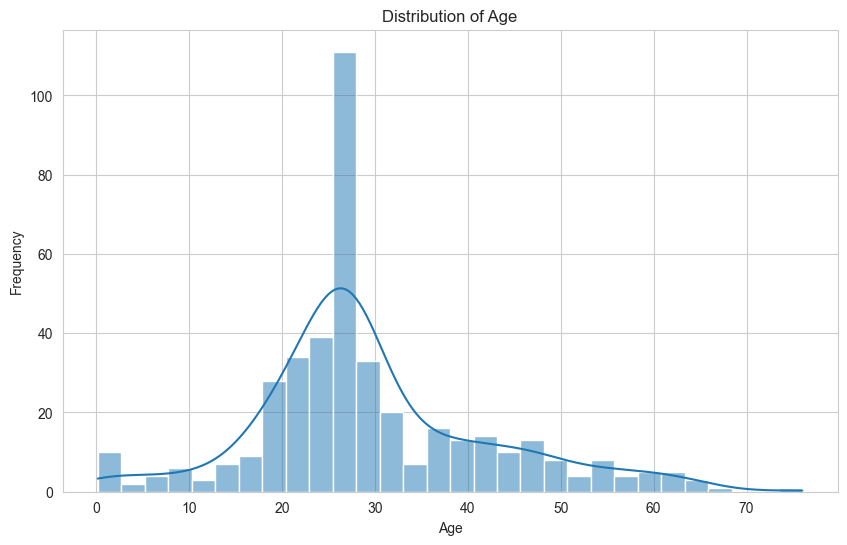

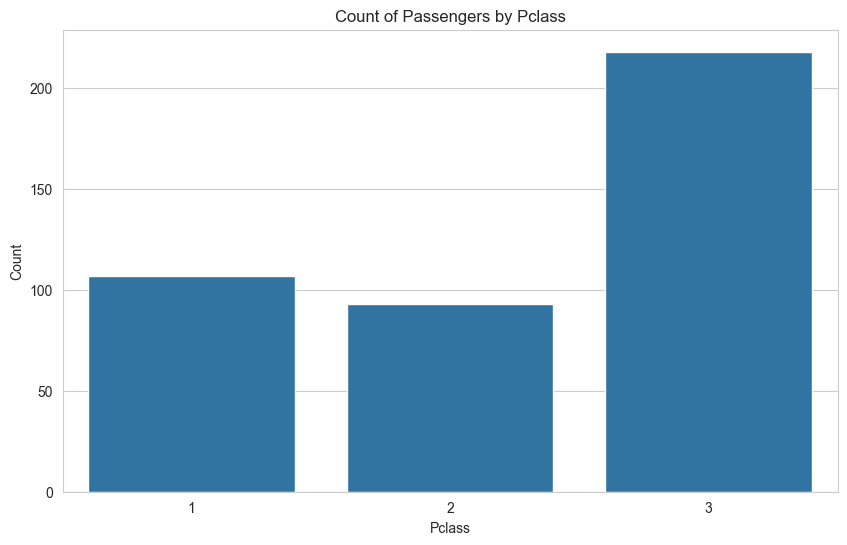

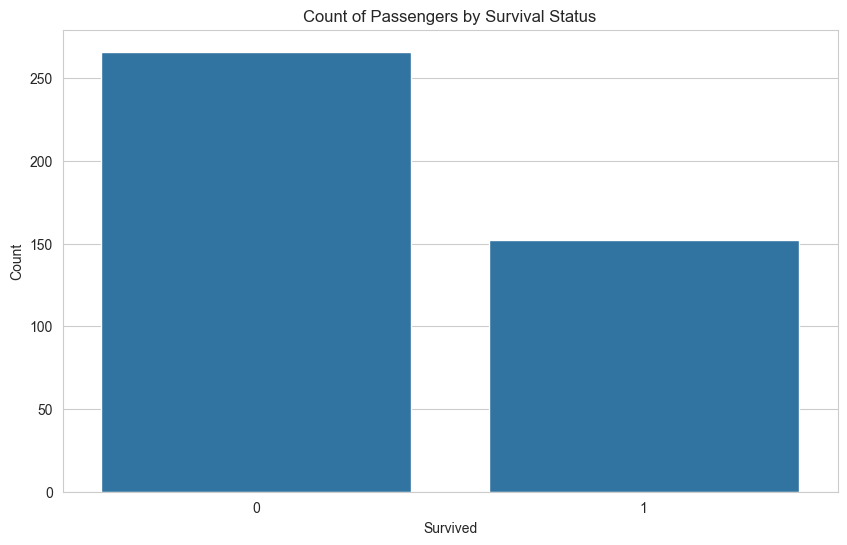

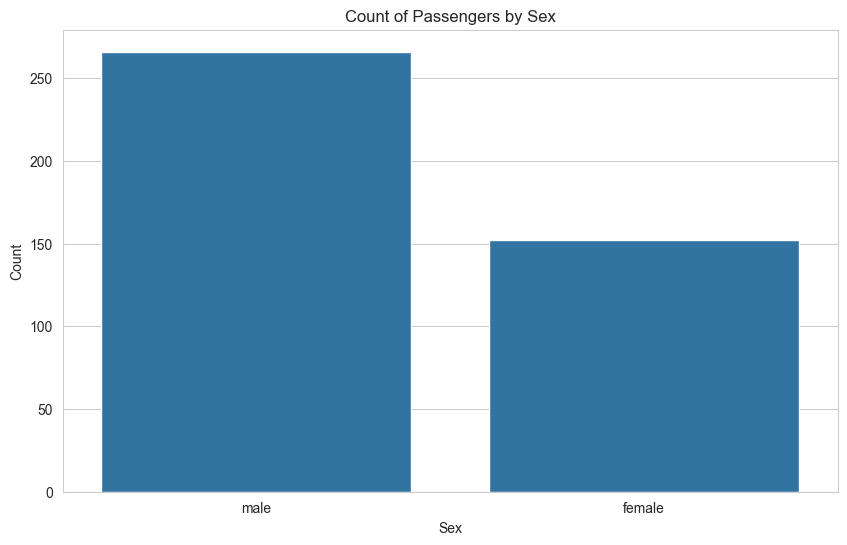

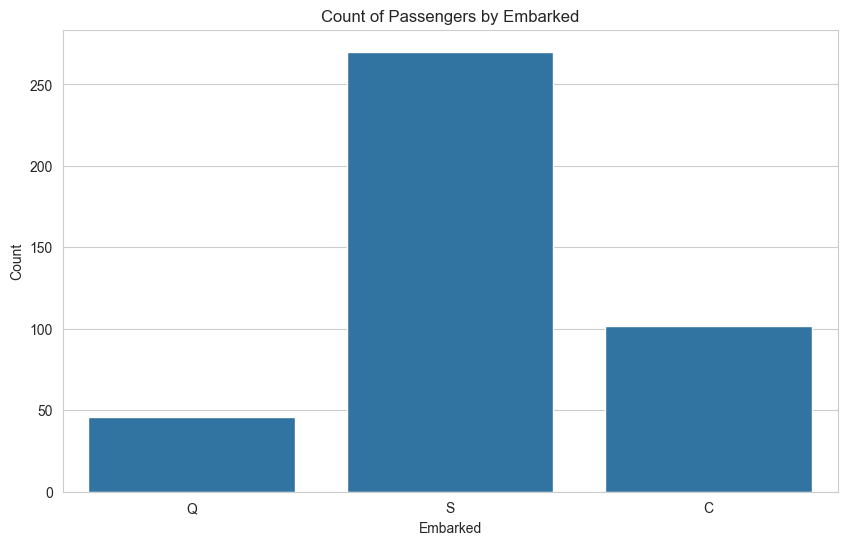

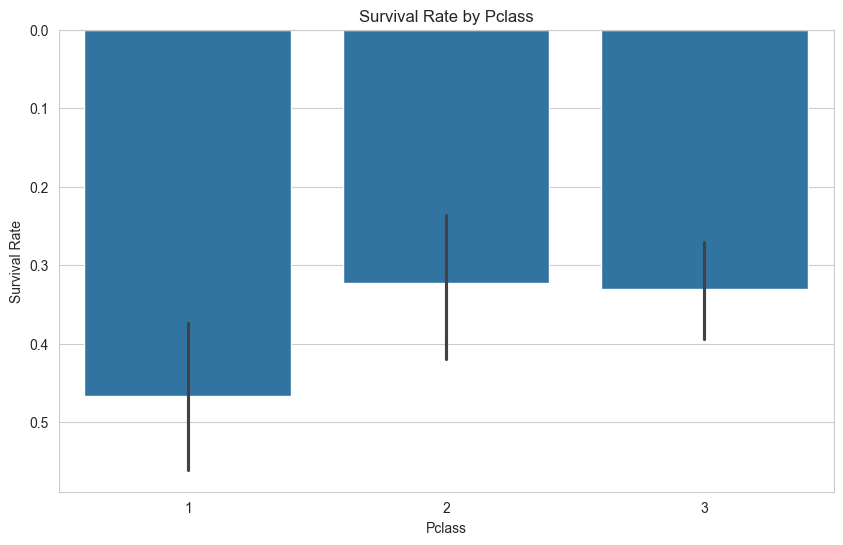

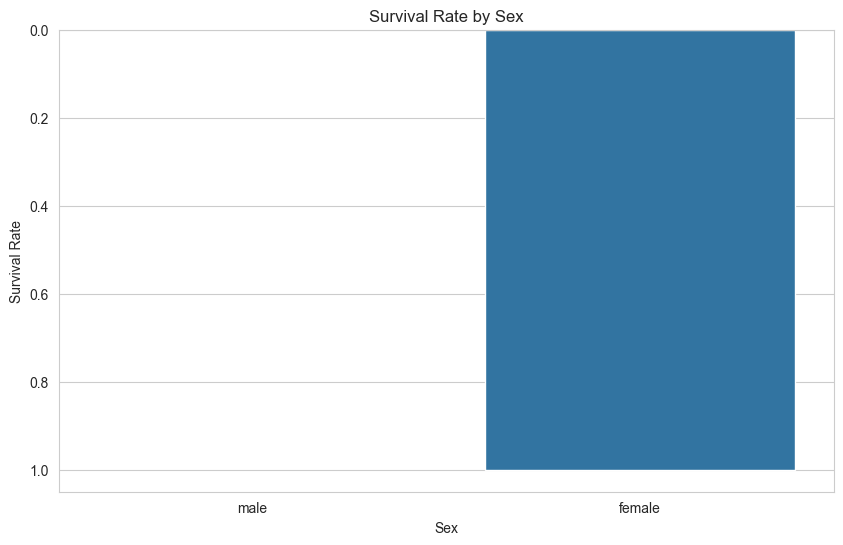

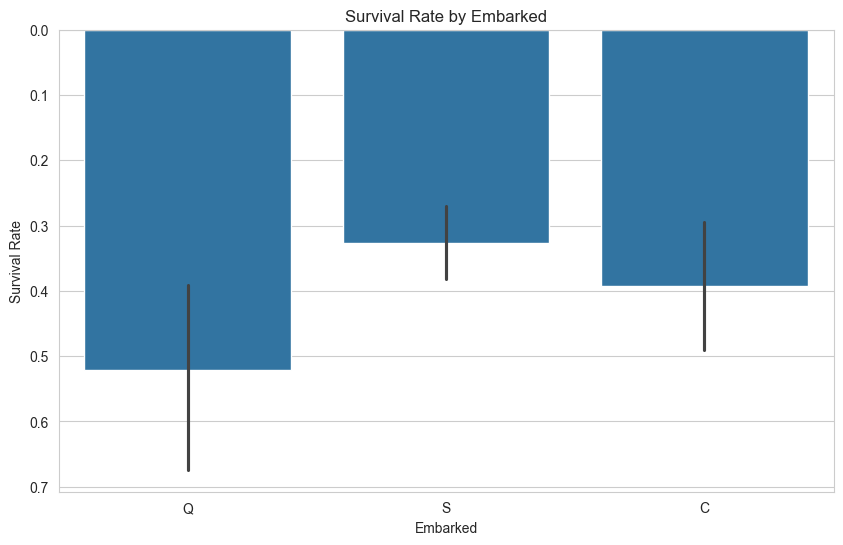

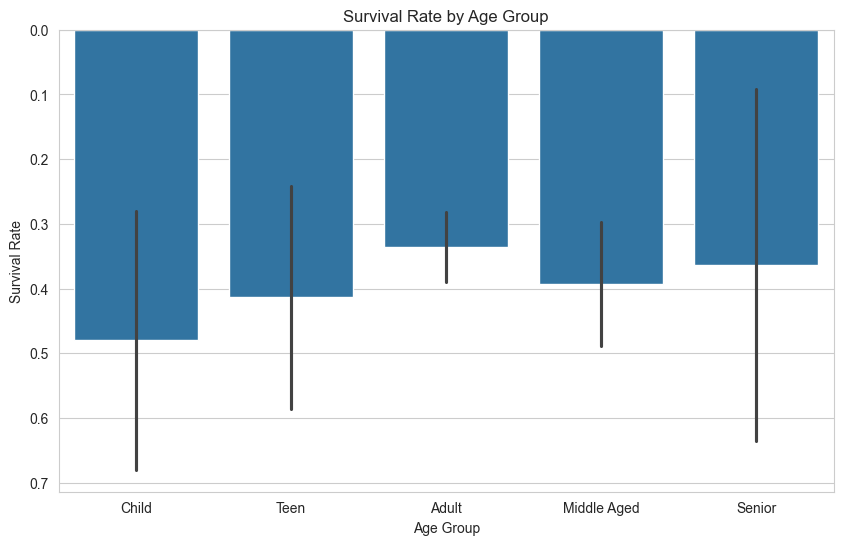

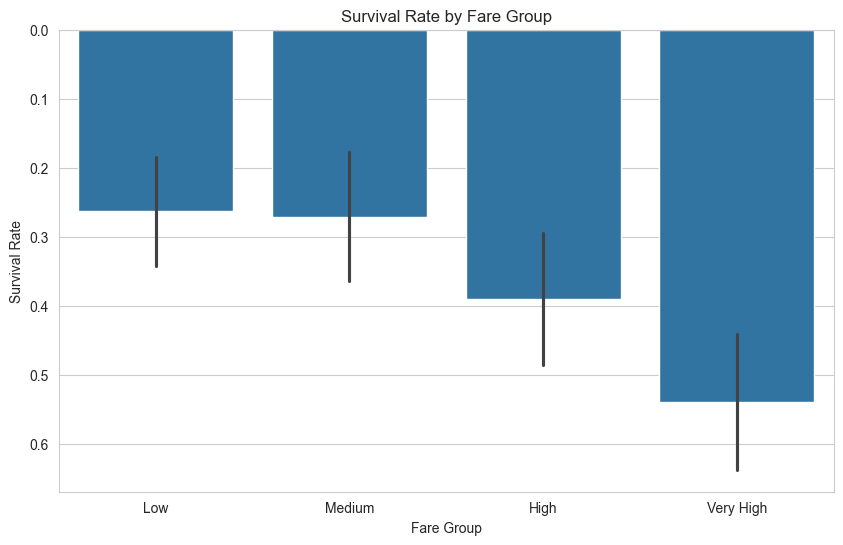

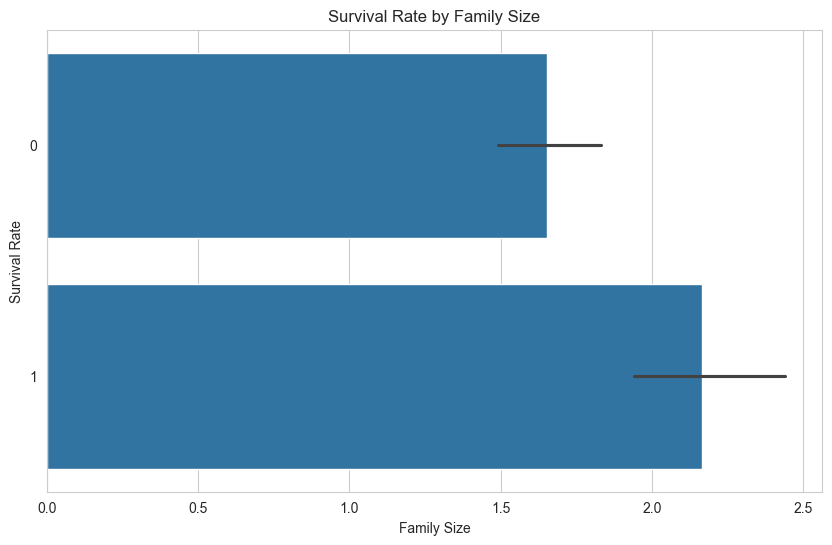

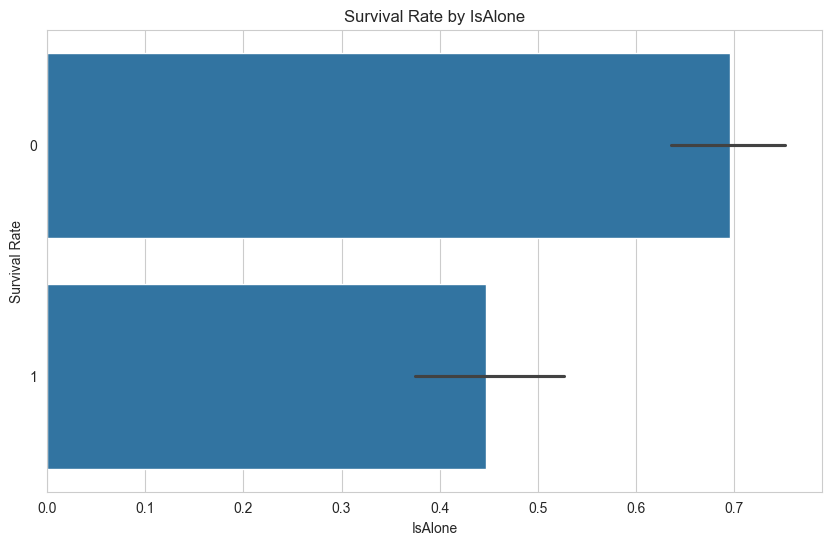

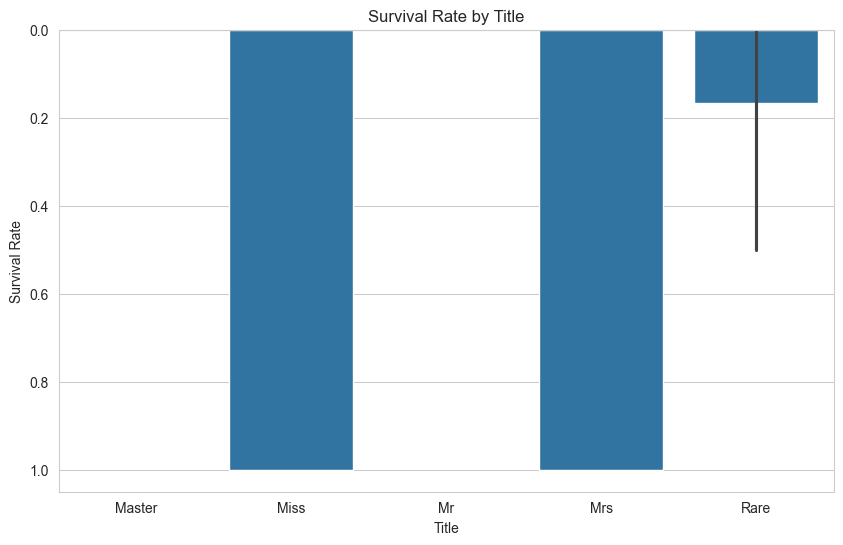

In [6]:
# Data Visualization

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the count of passengers by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers by 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Passengers by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers by 'Sex'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=titanic_df)
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers by 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Plot the survival rate by 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'Embarked'
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'AgeGroup'
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=titanic_df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'FareGroup'
plt.figure(figsize=(10, 6))
sns.barplot(x='FareGroup', y='Survived', data=titanic_df)
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'FamilySize'
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'IsAlone'
plt.figure(figsize=(10, 6))
sns.barplot(x='IsAlone', y='Survived', data=titanic_df)
plt.title('Survival Rate by IsAlone')
plt.xlabel('IsAlone')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by 'Title'
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

# Model Building
Build machine learning models to predict survival, including data splitting and model training.

In [8]:
# Model Building

# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FareGroup']
X = pd.get_dummies(titanic_df[features], drop_first=True)
y = titanic_df['Survived']
# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions with the Logistic Regression model
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_class_report = classification_report(y_test, y_pred_logreg)

# Print Logistic Regression evaluation metrics
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)
print("Logistic Regression Classification Report:\n", logreg_class_report)

# Train a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions with the Random Forest Classifier model
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

# Print Random Forest Classifier evaluation metrics
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classifier Classification Report:\n", rf_class_report)

Logistic Regression Accuracy: 0.9880952380952381
Logistic Regression Confusion Matrix:
 [[50  0]
 [ 1 33]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Confusion Matrix:
 [[50  0]
 [ 0 34]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Model Evaluation
Evaluate the performance of the models using appropriate metrics.

In [9]:
# Model Evaluation

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_class_report = classification_report(y_test, y_pred_logreg)

# Print Logistic Regression evaluation metrics
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)
print("Logistic Regression Classification Report:\n", logreg_class_report)

# Evaluate the Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

# Print Random Forest Classifier evaluation metrics
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classifier Classification Report:\n", rf_class_report)

Logistic Regression Accuracy: 0.9880952380952381
Logistic Regression Confusion Matrix:
 [[50  0]
 [ 1 33]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Confusion Matrix:
 [[50  0]
 [ 0 34]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

